# 1. Pandas 기초 (미국 역대 대통령의 키)

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [2]:
print(type(data))

# data Frame은 Dictionary 이다.
data.keys()
heights = np.array(data['height(cm)'])

print('mean', heights.mean())
print('max', heights.max())
print('min', heights.min())
print('std', heights.std())

<class 'pandas.core.frame.DataFrame'>
mean 179.73809523809524
max 193
min 163
std 6.931843442745892


In [3]:
import matplotlib.pyplot as plt
plt.hist(heights)

(array([ 1.,  2.,  3.,  5.,  3.,  6., 12.,  3.,  5.,  2.]),
 array([163., 166., 169., 172., 175., 178., 181., 184., 187., 190., 193.]),
 <a list of 10 Patch objects>)

# 2. Merge
- 데이터를 불러오자.

In [4]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [5]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [6]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [7]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


<img src="./img/join-or-merge-in-python-pandas-1.png" align="left"/>

- pop와 abbrevs 를 먼저 Merge한다.
- pop['state/region'] 과 abbrevs['abbreviation'] 가 동일함을 알 수 있다.
- 이 두 가지를 기준으로 두 DF를 붙이도록 하겠다.

In [8]:
merged = pd.merge(pop, abbrevs, how='outer', left_on = 'state/region', right_on = 'abbreviation')
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


- 'state/region'나 'abbreviation' 둘 중 하나는 지우도록 한다
- axis=1 을 넣어서 컬럼이 지워지게 하자.
- 아무것도 안 넣으면 Row가 지워짐

In [9]:
# merged = merged.drop('abbreviation', axis=1)
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


# 3. Boolean Indexing (loc함수) Null 데이터 처리방법

- Outer 조인을 했기 때문에 원본 소스에서 사용할 수 있는 데이터가 없을 수 있다.
- 이런 데이터는 모두 null 이 들어갔을 것이다.
- 먼저 null 값이 있는 컬럼을 찾아내야 한다.

In [10]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
abbreviation     True
dtype: bool

In [11]:
merged.keys()

Index(['state/region', 'ages', 'year', 'population', 'state', 'abbreviation'], dtype='object')

- loc [ ] 함수를 쓰면, Bool Indexing은 Data Frame에서도 가능함
- 단, Indexing 배열이 1차원이면 loc()생략할 수 있음 (권장안함)

In [12]:
idx = merged['population'].isnull()
idx

0       False
1       False
2       False
3       False
4       False
        ...  
2539    False
2540    False
2541    False
2542    False
2543    False
Name: population, Length: 2544, dtype: bool

In [13]:
merged[idx] #  Indexing 배열이 1차원이면 loc()생략할 수 있음 (권장안함)
#merged.loc[idx]

,state/region,ages,year,population,state,abbreviation
2448,PR,under18,1990,NaN,NaN,NaN
2449,PR,total,1990,NaN,NaN,NaN
2450,PR,total,1991,NaN,NaN,NaN
2451,PR,under18,1991,NaN,NaN,NaN
2452,PR,total,1993,NaN,NaN,NaN
2453,PR,under18,1993,NaN,NaN,NaN
2454,PR,under18,1992,NaN,NaN,NaN
2455,PR,total,1992,NaN,NaN,NaN
2456,PR,under18,1994,NaN,NaN,NaN
2457,PR,total,1994,NaN,NaN,NaN


In [14]:
idx = merged['state'].isnull()
merged.loc[idx]

,state/region,ages,year,population,state,abbreviation
2448,PR,under18,1990,NaN,NaN,NaN
2449,PR,total,1990,NaN,NaN,NaN
2450,PR,total,1991,NaN,NaN,NaN
2451,PR,under18,1991,NaN,NaN,NaN
2452,PR,total,1993,NaN,NaN,NaN
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


In [15]:
# merged[idx, 'state/region'] # TypeError 발생
stat_reg = merged.loc[idx, 'state/region']
stat_reg

2448     PR
2449     PR
2450     PR
2451     PR
2452     PR
       ... 
2539    USA
2540    USA
2541    USA
2542    USA
2543    USA
Name: state/region, Length: 96, dtype: object

In [16]:
# stat_reg 에서 중복된 요소를 제거하면 뭐가 나올까?
stat_reg.unique()

array(['PR', 'USA'], dtype=object)

In [17]:
idx = merged['state/region'] == "PR"
merged.loc[idx, 'state'] = 'Puerto Rico'

In [18]:
idx = merged['state/region'] == "USA"
merged.loc[idx, 'state'] = 'United States'

In [19]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
abbreviation     True
dtype: bool

- 면적 데이터도 붙여 보겠다.

In [20]:
# state라는 동일한 컬럼이 존재하므로 ...
final = pd.merge(merged, areas, on = 'state', how = 'left')
final

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,AL,52423.0
1,AL,total,2012,4817528.0,Alabama,AL,52423.0
2,AL,under18,2010,1130966.0,Alabama,AL,52423.0
3,AL,total,2010,4785570.0,Alabama,AL,52423.0
4,AL,under18,2011,1125763.0,Alabama,AL,52423.0
...,...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States,NaN,NaN
2540,USA,under18,2011,73902222.0,United States,NaN,NaN
2541,USA,total,2011,311582564.0,United States,NaN,NaN
2542,USA,under18,2012,73708179.0,United States,NaN,NaN


In [21]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
abbreviation      True
area (sq. mi)     True
dtype: bool

In [22]:
final.keys()

Index(['state/region', 'ages', 'year', 'population', 'state', 'abbreviation',
       'area (sq. mi)'],
      dtype='object')

In [23]:
final.loc[final['area (sq. mi)'].isnull()]

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
2496,USA,under18,1990,64218512.0,United States,NaN,NaN
2497,USA,total,1990,249622814.0,United States,NaN,NaN
2498,USA,total,1991,252980942.0,United States,NaN,NaN
2499,USA,under18,1991,65313018.0,United States,NaN,NaN
2500,USA,under18,1992,66509177.0,United States,NaN,NaN
2501,USA,total,1992,256514231.0,United States,NaN,NaN
2502,USA,total,1993,259918595.0,United States,NaN,NaN
2503,USA,under18,1993,67594938.0,United States,NaN,NaN
2504,USA,under18,1994,68640936.0,United States,NaN,NaN
2505,USA,total,1994,263125826.0,United States,NaN,NaN


In [24]:
# Area 값이 Null 인 것을 지워 버리자.
# final = final.loc[final['area (sq. mi)'].notnull()]
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
abbreviation      True
area (sq. mi)     True
dtype: bool

# 4. numexpr 라이브러리
- numexpr 라이브러리를 활용하여, 미국주에서 인구밀도가 가장 낮은 State를 찾아보자.

In [25]:
import numexpr

In [26]:
data2010 = final.query("year == 2010 & ages == 'total' ")
data2010.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,AL,52423.0
91,AK,total,2010,713868.0,Alaska,AK,656425.0
101,AZ,total,2010,6408790.0,Arizona,AZ,114006.0
189,AR,total,2010,2922280.0,Arkansas,AR,53182.0
197,CA,total,2010,37333601.0,California,CA,163707.0


In [27]:
data2010.set_index('state', inplace=True)

In [28]:
data2010.keys()

Index(['state/region', 'ages', 'year', 'population', 'abbreviation',
       'area (sq. mi)'],
      dtype='object')

In [29]:
# 인구밀도 = population / area
density = data2010['population'] / data2010['area (sq. mi)']
density.head()

state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64

In [30]:
density.sort_values().head()

state
Alaska           1.087509
Wyoming          5.768079
Montana          6.736171
North Dakota     9.537565
South Dakota    10.583512
dtype: float64

In [31]:
density.sort_values().tail()

state
Rhode Island             681.339159
New Jersey              1009.253268
Puerto Rico             1058.665149
District of Columbia    8898.897059
United States                   NaN
dtype: float64

# 5. 집계와 분류 (Titanic Data)

- Data analysis : Before applying the Preprocessing and Machine Learning algorithm, it is important to first understand how the given data is organized. The data presented by this Kaggle Project contains the following information.

<img src="./img/titanic.jpg">

<img src="./img/infor.png" align="left"/>

<div style="text-align: right"> S : Southampton, Q : Queenstown, C : Cherbourge </div>

$\quad$Let's take a look at the description and code below to see how the above information is stored in the data and how the data is distributed.
<br>

In [32]:
data = pd.read_csv('data/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
type(data)

pandas.core.frame.DataFrame

In [34]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


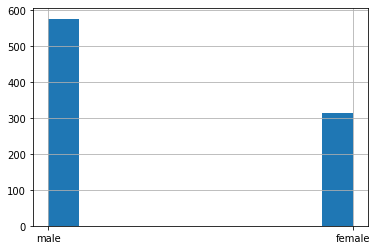

In [35]:
data["Sex"].hist()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6d83b4190>]]


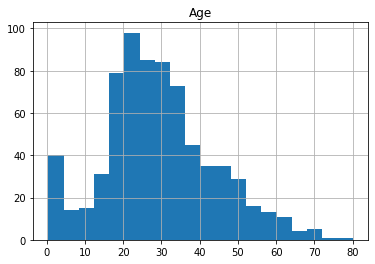

In [36]:
#  Read Data
data = pd.read_csv('data/train.csv');

print(data[["Age"]].hist(bins=20))

$\quad$First, it reads the data. The data includes train.csv for training and test.csv for testing. Use the read_csv function of the pandas library to read both data. The imported data is specified as train_data and test_data, respectively.
<br>

$\quad$It is necessary to check how the above information is stored in the read data. Let's run the code below to check out the parts of train.csv and test.csv.

In [37]:
# read first 5 of train_data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# read last 5 of train_data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


$\quad$train_data is used for each row to display "PassangerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Embarked" information. Here, 11 pieces of information except for "Survived" correspond to the feature, and "Survived" corresponds to the label.
<br>
<br>

$\quad$If you look at test_data, you will see the following information from each row: "PassangerId", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked" are included. Unlike train_data, there is no "Survived" information corresponding to the label because test_data is data used to verify the model.
<br>
<br>
$\quad$As far as we can see, "PassangerId" is simply a feature that is attached for ordering and it is not necessary data to judge whether passennger is actually alive. And because "Pclass", "Age", "SipSp", "Parch", "Fare" are numeric information, machine learning algorithm can be applied even without preprocessing. However, other information such as "Name", "Sex", "Ticket", "Cabin", "Embarked" need appropriate preprocessing such as removing information and extracting new information before vectorization.
<br>
<br>
<br>


$\quad$Now, look at the distribution of given data, the relationship between survivability ("Survived"), and how to preprocess the data.
<br>
<br>
$\quad$First, let's look at the distribution of the numeric information in the data. Execute the following code to check the distribution.

In [39]:
# Analyze numeric information of train_data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


$\quad$Note that, count(number of data), mean, std(standard deviation), min(minimum) the upper 25%, 50% 75% and max(maximum) are printed.
<br>
<br>
$\quad$For "count", the number of "PassengerId" is 891, so train_data contains a total of 891 people. For "Age", its count is 714, thus "Age" is not known for 177 passengers.
<br>
<br>
$\quad$Next is mean. You can see that average value of survival rate is 38.4%, ticket class is 2.3, number of sisters and brothers are 0.52 number of parents are 0.38 and the ticket cost is 32.2.
<br>
<br>
$\quad$The next values ​​are min, max, 25%, 50%, and 75%. These values allow us to understand the overall distribution and to make various interpretations. For example, "SibSp" and "Parch" are 1 or 0 in the top 75%, so most passengers boarded alone without a family. And up to 75% of the "Fare" was 31, but the max is 512, so some customers pay a lot more than other customers. If you want to know the value of the upper 60%, 80%, etc., you can change the value inside the percentile of the above code to 0.75, 0.8.
<br>
<br>
$\quad$The distribution of other information, except for the numeric information, can be seen by running the following code:

In [40]:
# Analyze non-numeric information of train_data
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Penasco y Castellana, Mrs. Victor de Satode (M...",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


$\quad$The code above shows the distribution of the non-numeric information "Name", "Sex", "Ticket", "Cabin", "Embarked". The output is "count" (number), "unique" (number of different information), "top" (top information), and "freq" (most frequent).
<br>
<br>
$\quad$For "count", train_data has a total of 891, so most information has 891 values. However, we can confirm that some portions of the information of "Cabin" and "Embarked" are unknown.
<br>
<br>
$\quad$For "Unique", "Name" has the value of 891, so everyone in train_data has a different name. There are two sexes, male and female, so it has a value of 2. Ticket and cabin are 681 and 147, respectively, and there are passengers with the same ticket or cabin number. Finally, since Titanic has three departing ports, so embarked is three.
<br>
<br>
$\quad$"top" is the most common information, and "freq" is the number of that information. Because "Name" is different for each person, freq is 1 and the value of top is not significant. "Sex" is 577 male, so there were 577 men and 314 women passengers. And if you look at "Embarked" you can see that most of the passengers (644) boarded at port "S" (Southampton).
<br>
<br>
<br>
<br>
<br>
<br>
$\quad$Next, we examine how each of feature is related with "Survived".

In [41]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [43]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
data[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [45]:
data[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [46]:
data[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [47]:
# Statistics between "Pclass" and "Survived"
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


First, the relationship between "Pclass" and "Survived". The results show that the higher the ticket rating, the higher the survival rate.

In [48]:
# Statistics between "Sex" and "Survived"
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


The survival rate of women is much higher than that of men.

In [49]:
# Statistics between "SibSp" and "Survived"
data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


"SibSp" is the number of brothers and sisters. In general, the lower the number of brothers and sisters shows the higher the survival rate.

In [50]:
# Statistics between "Parch" and "Survived"
data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


"Parch" is the number of parents and children. The lower the number, as in "SibSp" above, the higher the survival rate.

In [51]:
# Statistics between "Embarked" and "Survived"
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


"Embarked" is the boarding location. The survival rate is much higher than the other areas when the boarding location is "C", and is the lowest for "S" where the most people boarded.

$\quad$
"Pclass", "Sex" and "Embarked" are good features that can be directly related to "Survived". Also, you can use "Sex" and "Embarked" for training after vectorization of "Sex" and restoration of some unknown information of "Embarked".
<br>
<br>
$\quad$"SibSp" and "Parch", as we have seen above, tend to have a high survival rate when the number is small, but it is difficult to find a direct association. Therefore,we may apply the following preprocessing: '0' if the number is small (less or equal to 4) and '1' if it is big (more than 4). Since both of them indicate the number of family members, it is desirable to use "FamilySize" which is the sum of the two values ​​rather than using both of them.